# Final Project Submission

Please fill out:
* Student name: Xin Wen
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name:  
* Blog post URL:


In [1]:
import math
import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.dpi'] = 1200 #dpi
plt.rcParams['figure.figsize'] = (10.0, 6.0)   # size of image


Clean 1st dataframe

In [2]:
df_0 = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df_0 = df_0.drop(['tconst','original_title','start_year', 'runtime_minutes'], axis=1)
df_0 = df_0.drop_duplicates('primary_title')
df_0 = df_0.dropna()
df_0

,primary_title,genres
0,Sunghursh,"Action,Crime,Drama"
1,One Day Before the Rainy Season,"Biography,Drama"
2,The Other Side of the Wind,Drama
3,Sabse Bada Sukh,"Comedy,Drama"
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy"
...,...,...
146138,The Secret of China,"Adventure,History,War"
146139,Kuambil Lagi Hatiku,Drama
146140,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary
146141,Dankyavar Danka,Comedy


Clean 2nd dataframe - to be merged to 1st df

In [3]:
df_merge = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_merge = df_merge.drop(['id','domestic_gross'], axis=1)
df_merge['gross'] = df_merge.apply(lambda row: int(row.worldwide_gross.replace('$', '').replace(',', '')), axis=1)
df_merge['budget'] = df_merge.apply(lambda row: int(row.production_budget.replace('$', '').replace(',', '')), axis=1)
df_merge['date'] = df_merge.apply(lambda r: datetime.datetime.strptime(r.release_date, '%b %d, %Y'), axis=1)
df_merge = df_merge.drop(['production_budget', 'worldwide_gross', 'release_date'],axis=1)
df_merge

,movie,gross,budget,date
0,Avatar,2776345279,425000000,2009-12-18
1,Pirates of the Caribbean: On Stranger Tides,1045663875,410600000,2011-05-20
2,Dark Phoenix,149762350,350000000,2019-06-07
3,Avengers: Age of Ultron,1403013963,330600000,2015-05-01
4,Star Wars Ep. VIII: The Last Jedi,1316721747,317000000,2017-12-15
...,...,...,...,...
5777,Red 11,0,7000,2018-12-31
5778,Following,240495,6000,1999-04-02
5779,Return to the Land of Wonders,1338,5000,2005-07-13
5780,A Plague So Pleasant,0,1400,2015-09-29


Combine 1st and 2nd df

In [4]:
df_2file = df_0.merge(df_merge, how='inner', left_on='primary_title', right_on='movie')
df_2file

,primary_title,genres,movie,gross,budget,date
0,Foodfight!,"Action,Animation,Comedy",Foodfight!,73706,45000000,2012-12-31
1,Mortal Kombat,"Action,Adventure,Fantasy",Mortal Kombat,122133227,20000000,1995-08-18
2,On the Road,"Adventure,Drama,Romance",On the Road,9313302,25000000,2013-03-22
3,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,187861183,91000000,2013-12-25
4,A Walk Among the Tombstones,"Action,Crime,Drama",A Walk Among the Tombstones,62108587,28000000,2014-09-19
...,...,...,...,...,...,...
2346,Fuel,"Documentary,Sport",Fuel,174255,2500000,2008-11-14
2347,Diner,Crime,Diner,12592907,5000000,1982-04-02
2348,Traitor,"Action,Drama,Romance",Traitor,27882226,22000000,2008-08-27
2349,Ray,Crime,Ray,124823094,40000000,2004-10-29


Clean 3rd df

In [5]:
df_merge = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df_merge = df_merge.drop(['domestic_gross', 'foreign_gross', 'year'], axis=1)
df_merge

,title,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
4,Shrek Forever After,P/DW
...,...,...
3382,The Quake,Magn.
3383,Edward II (2018 re-release),FM
3384,El Pacto,Sony
3385,The Swan,Synergetic


Combine with previous df

In [6]:
df_3file = df_2file.merge(df_merge, how='inner', left_on='primary_title', right_on='title')
df_3file

,primary_title,genres,movie,gross,budget,date,title,studio
0,On the Road,"Adventure,Drama,Romance",On the Road,9313302,25000000,2013-03-22,On the Road,IFC
1,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,187861183,91000000,2013-12-25,The Secret Life of Walter Mitty,Fox
2,A Walk Among the Tombstones,"Action,Crime,Drama",A Walk Among the Tombstones,62108587,28000000,2014-09-19,A Walk Among the Tombstones,Uni.
3,Jurassic World,"Action,Adventure,Sci-Fi",Jurassic World,1648854864,215000000,2015-06-12,Jurassic World,Uni.
4,The Rum Diary,"Comedy,Drama",The Rum Diary,21544732,45000000,2011-10-28,The Rum Diary,FD
...,...,...,...,...,...,...,...,...
1156,Uncle Drew,"Comedy,Sport",Uncle Drew,46527161,18000000,2018-06-29,Uncle Drew,LG/S
1157,BlacKkKlansman,"Biography,Crime,Drama",BlacKkKlansman,93017335,15000000,2018-08-10,BlacKkKlansman,Focus
1158,"Paul, Apostle of Christ","Adventure,Biography,Drama","Paul, Apostle of Christ",25529498,5000000,2018-03-23,"Paul, Apostle of Christ",Affirm
1159,Instant Family,"Comedy,Drama",Instant Family,119736188,48000000,2018-11-16,Instant Family,Par.


Remove useless list in df

In [7]:
df_3file = df_3file.drop(['movie', 'title'],axis=1)
df_3file

,primary_title,genres,gross,budget,date,studio
0,On the Road,"Adventure,Drama,Romance",9313302,25000000,2013-03-22,IFC
1,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",187861183,91000000,2013-12-25,Fox
2,A Walk Among the Tombstones,"Action,Crime,Drama",62108587,28000000,2014-09-19,Uni.
3,Jurassic World,"Action,Adventure,Sci-Fi",1648854864,215000000,2015-06-12,Uni.
4,The Rum Diary,"Comedy,Drama",21544732,45000000,2011-10-28,FD
...,...,...,...,...,...,...
1156,Uncle Drew,"Comedy,Sport",46527161,18000000,2018-06-29,LG/S
1157,BlacKkKlansman,"Biography,Crime,Drama",93017335,15000000,2018-08-10,Focus
1158,"Paul, Apostle of Christ","Adventure,Biography,Drama",25529498,5000000,2018-03-23,Affirm
1159,Instant Family,"Comedy,Drama",119736188,48000000,2018-11-16,Par.


Add a list "net": gross income - budget = net income

In [8]:
df_3file['net'] = df_3file.gross - df_3file.budget
df_3file

,primary_title,genres,gross,budget,date,studio,net
0,On the Road,"Adventure,Drama,Romance",9313302,25000000,2013-03-22,IFC,-15686698
1,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",187861183,91000000,2013-12-25,Fox,96861183
2,A Walk Among the Tombstones,"Action,Crime,Drama",62108587,28000000,2014-09-19,Uni.,34108587
3,Jurassic World,"Action,Adventure,Sci-Fi",1648854864,215000000,2015-06-12,Uni.,1433854864
4,The Rum Diary,"Comedy,Drama",21544732,45000000,2011-10-28,FD,-23455268
...,...,...,...,...,...,...,...
1156,Uncle Drew,"Comedy,Sport",46527161,18000000,2018-06-29,LG/S,28527161
1157,BlacKkKlansman,"Biography,Crime,Drama",93017335,15000000,2018-08-10,Focus,78017335
1158,"Paul, Apostle of Christ","Adventure,Biography,Drama",25529498,5000000,2018-03-23,Affirm,20529498
1159,Instant Family,"Comedy,Drama",119736188,48000000,2018-11-16,Par.,71736188


Clean 4th df

In [9]:
df_merge = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df_merge = df_merge.loc[:, ['title', 'vote_average', 'vote_count']]
df_merge

,title,vote_average,vote_count
0,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,How to Train Your Dragon,7.7,7610
2,Iron Man 2,6.8,12368
3,Toy Story,7.9,10174
4,Inception,8.3,22186
...,...,...,...
26512,Laboratory Conditions,0.0,1
26513,_EXHIBIT_84xxx_,0.0,1
26514,The Last One,0.0,1
26515,Trailer Made,0.0,1


Combine with previous df

In [10]:
df_4file = df_3file.merge(df_merge, how='inner', left_on='primary_title', right_on='title')
df_4file = df_4file.drop(['title'], axis=1)
df_4file = df_4file.drop_duplicates('primary_title')
df_4file = df_4file.reset_index()
df_4file = df_4file.drop(['index'], axis=1)
df_4file

,primary_title,genres,gross,budget,date,studio,net,vote_average,vote_count
0,On the Road,"Adventure,Drama,Romance",9313302,25000000,2013-03-22,IFC,-15686698,5.6,518
1,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",187861183,91000000,2013-12-25,Fox,96861183,7.1,4859
2,A Walk Among the Tombstones,"Action,Crime,Drama",62108587,28000000,2014-09-19,Uni.,34108587,6.3,1685
3,Jurassic World,"Action,Adventure,Sci-Fi",1648854864,215000000,2015-06-12,Uni.,1433854864,6.6,14056
4,The Rum Diary,"Comedy,Drama",21544732,45000000,2011-10-28,FD,-23455268,5.7,652
...,...,...,...,...,...,...,...,...,...
1132,Uncle Drew,"Comedy,Sport",46527161,18000000,2018-06-29,LG/S,28527161,6.5,220
1133,BlacKkKlansman,"Biography,Crime,Drama",93017335,15000000,2018-08-10,Focus,78017335,7.6,3138
1134,"Paul, Apostle of Christ","Adventure,Biography,Drama",25529498,5000000,2018-03-23,Affirm,20529498,7.1,98
1135,Instant Family,"Comedy,Drama",119736188,48000000,2018-11-16,Par.,71736188,7.6,782


In [11]:
df_4file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 9 columns):
primary_title    1137 non-null object
genres           1137 non-null object
gross            1137 non-null int64
budget           1137 non-null int64
date             1137 non-null datetime64[ns]
studio           1137 non-null object
net              1137 non-null int64
vote_average     1137 non-null float64
vote_count       1137 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 80.1+ KB


## 1. Genre relationship with Profit (profit = net income)

In [12]:
df = df_4file.loc[:, ['genres', 'net']]
df = df.sort_values('net', ascending=False).head(500)
df.genres = df.apply(lambda series: series.genres.split(','), axis=1)
df = df.explode('genres')
df

,genres,net
1,Adventure,96861183
1,Comedy,96861183
1,Drama,96861183
3,Action,1433854864
3,Adventure,1433854864
...,...,...
1135,Comedy,71736188
1135,Drama,71736188
1136,Drama,60133905
1136,Horror,60133905


In [13]:
pivot = df.pivot_table('net', index='genres', aggfunc=lambda lst: sum(lst) / len(lst))
pivot = pivot.sort_values('net', ascending=True)
pivot.net = pivot.net / 1E6 # unit: million dollar
pivot

,net
genres,
War,86.978583
Romance,130.011692
Horror,138.862137
Mystery,144.855538
Documentary,152.338449
History,152.795813
Drama,161.539195
Crime,184.155352
Biography,186.010048


Chart color refrence from [ECharts guildiance](https://vis.baidu.com/chartcolor/color/)

Text(0.5, 1.0, 'Top 500 Profit Movies')

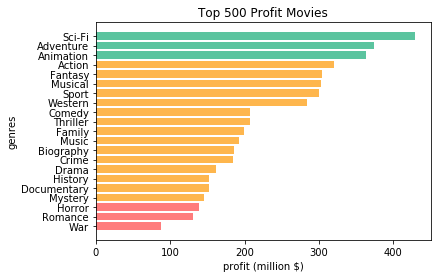

In [14]:
color = ['#ff7c7c'] * 3 + ['#feb64d'] * (len(pivot) - 6) + ['#5bc49f'] * 3
plt.barh(pivot.index, pivot.net, color=color)
plt.xlabel('profit (million $)')
plt.ylabel('genres')
plt.title('Top 500 Profit Movies')

## 2. Genre Relationship with Vote Average (vote count > 100 considered as valid)

In [15]:
df = df_4file.loc[:, ['primary_title','genres','vote_average','vote_count']]
df.genres = df.genres.str.split(',')
df = df.explode('genres')
df = df.loc[df.vote_count > 100]
df

,primary_title,genres,vote_average,vote_count
0,On the Road,Adventure,5.6,518
0,On the Road,Drama,5.6,518
0,On the Road,Romance,5.6,518
1,The Secret Life of Walter Mitty,Adventure,7.1,4859
1,The Secret Life of Walter Mitty,Comedy,7.1,4859
...,...,...,...,...
1135,Instant Family,Comedy,7.6,782
1135,Instant Family,Drama,7.6,782
1136,Hereditary,Drama,7.0,2491
1136,Hereditary,Horror,7.0,2491


In [16]:
pivot = df.pivot_table('vote_average', index='genres', aggfunc=lambda lst: sum(lst) / len(lst))
pivot = pivot.sort_values(by='vote_average',ascending=False)
pivot

,vote_average
genres,
Musical,7.066667
Documentary,6.980000
Biography,6.943137
History,6.930303
War,6.862500
Sport,6.705263
Music,6.640000
Drama,6.627342
Western,6.562500


Text(0.5, 1.0, 'Top 500 Rating Movies')

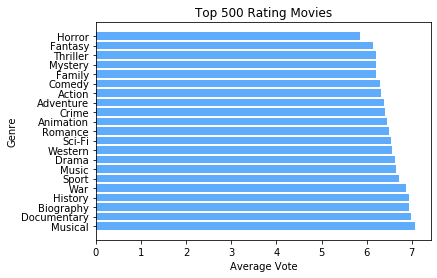

In [17]:
plt.barh(pivot.index, pivot.vote_average, color='#60acfc')
plt.xlabel('Average Vote')
plt.ylabel('Genre')
plt.title('Top 500 Rating Movies')

## 3. Release Time Relationship with Gross Income (pick top 500 movies in gross income)

In [18]:
df = df_4file.loc[:, ['date', 'gross']]
df = df.sort_values('gross', ascending=False).head(500)
df['month'] = df.apply(lambda series: series.date.month, axis=1)
df

,date,gross,month
1027,2018-04-27,2048134200,4
3,2015-06-12,1648854864,6
896,2015-04-03,1518722794,4
827,2015-05-01,1403013963,5
630,2018-02-16,1348258224,2
...,...,...,...
570,2014-06-27,88069880,6
669,2012-10-12,87727807,10
795,2018-03-23,87527651,3
34,2011-02-25,87173475,2


In [19]:
pivot = df.pivot_table('gross', index='month', aggfunc=lambda lst: sum(lst) / len(lst))
pivot.gross /= 1E6 # unit: million dollar
pivot['month'] = pivot.index
pivot.month = pivot.apply(lambda series: datetime.date(1, int(series.month), 1).strftime('%b'), axis=1)
pivot

,gross,month
month,,
1,166.371320,Jan
2,259.596602,Feb
3,266.255023,Mar
4,379.075776,Apr
5,445.418384,May
6,474.320646,Jun
7,364.974871,Jul
8,245.918041,Aug
9,216.060229,Sep


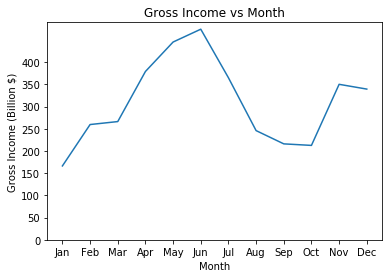

In [20]:
plt.plot(pivot.month, pivot.gross)
plt.xlabel('Month')
plt.ylabel('Gross Income (Billion $)')
plt.title('Gross Income vs Month')
plt.yticks(np.arange(0, 401, 50));

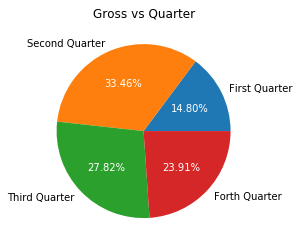

In [21]:
gross = [sum(pivot.loc[:3, :].gross),
 sum(pivot.loc[3:6, :].gross),
 sum(pivot.loc[6:9, :].gross),
 sum(pivot.loc[9:12, :].gross)]
labels = ['First Quarter', 'Second Quarter', 'Third Quarter', 'Forth Quarter']
plt.title('Gross vs Quarter')
_, _, autotexts = plt.pie(gross, labels=labels, autopct='%1.2f%%');
[text.set_color('white') for text in autotexts];

## 4. Studio vs Vote / Profit (profit = net income)

In [22]:
df = df_4file.loc[:, ['net', 'vote_average', 'studio']]
df

,net,vote_average,studio
0,-15686698,5.6,IFC
1,96861183,7.1,Fox
2,34108587,6.3,Uni.
3,1433854864,6.6,Uni.
4,-23455268,5.7,FD
...,...,...,...
1132,28527161,6.5,LG/S
1133,78017335,7.6,Focus
1134,20529498,7.1,Affirm
1135,71736188,7.6,Par.


In [23]:
pivot = df.pivot_table('vote_average', index='studio', aggfunc=lambda lst: sum(lst) / len(lst))
pivot = pivot.sort_values('vote_average', ascending=True).tail(5)
pivot

,vote_average
studio,
3D,7.400000
Osci.,7.433333
Neon,7.500000
Cleopatra,7.500000
Orch.,7.800000


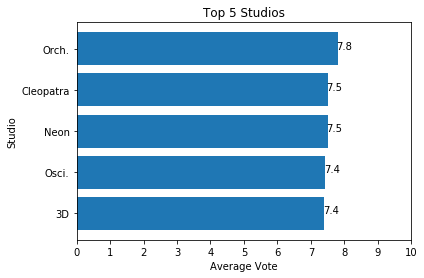

In [24]:
plt.xlabel('Average Vote')
plt.ylabel('Studio')
plt.title('Top 5 Studios')
plt.barh(pivot.index, pivot.vote_average)
for x,y in enumerate(pivot.vote_average):
    plt.text(y + 0.2, x, round(y, 1), ha='center')
plt.xticks(np.arange(0, 10.1, 1));

In [25]:
pivot = df.pivot_table('net', index='studio', aggfunc=lambda lst: sum(lst) / len(lst))
pivot = pivot.sort_values('net', ascending=True).tail(5)
pivot.net /= 1E6 # unit: million dollar
pivot

,net
studio,
Sony,179.342227
Uni.,180.247090
GrtIndia,233.502914
BV,334.024411
P/DW,374.402760


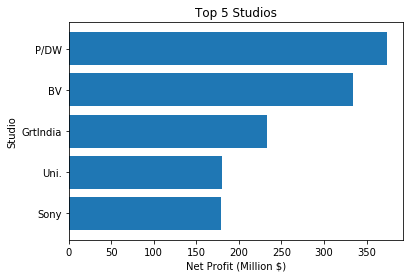

In [26]:
plt.xlabel('Net Profit (Million $)')
plt.ylabel('Studio')
plt.title('Top 5 Studios')
plt.barh(pivot.index, pivot.net);